[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


sentiment_label   Negative   Neutral  Positive
product_category                              
Bottoms           0.030657  0.002920  0.966423
Dresses           0.182085  0.019090  0.798825
Intimate          0.067692  0.015385  0.916923
Jackets           0.039706  0.005882  0.954412
Tops              0.019118  0.004412  0.976471


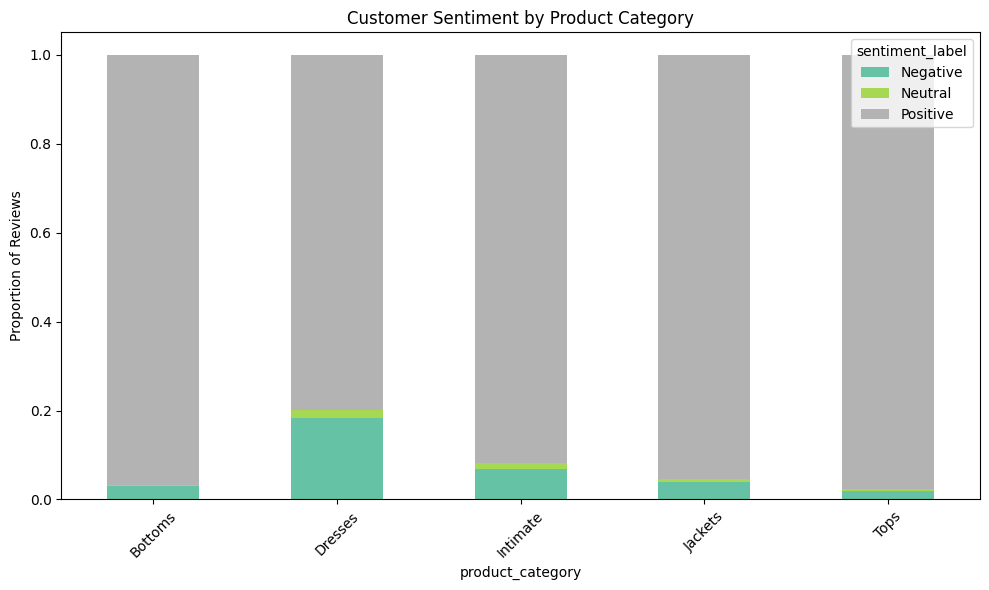

In [7]:
###Customer Satisfaction Analysis with TextBlob
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('dataset.csv')  # Columns: 'product_review', 'product_category'

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and preprocess text
def preprocess(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df['clean_review'] = df['product_review'].apply(preprocess)

# Sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['clean_review'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Grouped summary
summary = df.groupby('product_category')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0)

# Display summary
print(summary)

# Visualize
summary.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6))
plt.title('Customer Sentiment by Product Category')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Collect all cleaned text
all_words = " ".join(df['clean_review']).split()

# Get first 20 unique words
first_20_words = all_words[:20]

print("First 20 words after cleaning:")
print(first_20_words)


First 20 words after cleaning:
['love', 'love', 'love', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'every', 'time', 'wear', 'get', 'nothing', 'great', 'compliment', 'beautifully', 'made', 'pant', 'trend', 'flared', 'crop']


In [9]:
# Extend stopwords with additional non-meaningful words (based on your example)
custom_stopwords = stop_words.union({"every", "time", "something", "get"})

def preprocess_meaningful(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in custom_stopwords]
    return " ".join(tokens)

# Reapply with updated preprocessing
df['clean_review'] = df['product_review'].apply(preprocess_meaningful)

# Join all words and keep only unique ones (ordered by appearance)
all_words = " ".join(df['clean_review']).split()

# Use an OrderedDict to preserve order and remove duplicates
from collections import OrderedDict
unique_words_ordered = list(OrderedDict.fromkeys(all_words))

# Get the first 20 meaningful, unique words
first_20_meaningful = unique_words_ordered[:20]

print("First 20 unique, meaningful words:")
print(first_20_meaningful)


First 20 unique, meaningful words:
['love', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'wear', 'nothing', 'great', 'compliment', 'beautifully', 'made', 'pant', 'trend', 'flared', 'crop', 'much', 'cuter', 'person', 'never', 'would']


In [12]:
from collections import Counter

# All words (including duplicates)
all_words = " ".join(df['clean_review']).split()

# Count occurrences of words from the top 20 meaningful ones
word_counts = Counter(all_words)

# Get counts only for the first 20 meaningful ones
top_20_counts = {word: word_counts[word] for word in first_20_meaningful}

print(top_20_counts)


{'love': 1393, 'jumpsuit': 38, 'fun': 111, 'flirty': 4, 'fabulous': 45, 'wear': 1005, 'nothing': 48, 'great': 926, 'compliment': 137, 'beautifully': 63, 'made': 291, 'pant': 375, 'trend': 14, 'flared': 9, 'crop': 15, 'much': 372, 'cuter': 21, 'person': 183, 'never': 59, 'would': 663}


In [13]:
from collections import Counter

# All cleaned words with duplicates
all_words = " ".join(df['clean_review']).split()

# Count all word frequencies
word_counts = Counter(all_words)

# Get counts for only the first 20 meaningful words
top_20_counts = {word: word_counts[word] for word in first_20_meaningful}

# Sort by frequency (descending)
sorted_top_20 = sorted(top_20_counts.items(), key=lambda x: x[1], reverse=True)

# Display result
print("Top 20 unique meaningful words (sorted by frequency):")
for word, count in sorted_top_20:
    print(f"{word}: {count}")


Top 20 unique meaningful words (sorted by frequency):
love: 1393
wear: 1005
great: 926
would: 663
pant: 375
much: 372
made: 291
person: 183
compliment: 137
fun: 111
beautifully: 63
never: 59
nothing: 48
fabulous: 45
jumpsuit: 38
cuter: 21
crop: 15
trend: 14
flared: 9
flirty: 4


In [14]:
# Extend stopwords with additional non-meaningful words
custom_stopwords = stop_words.union({"would", "much", "never", "nothing", "something"})

# Update the preprocessing function to exclude these words
def preprocess_meaningful_updated(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in custom_stopwords]
    return " ".join(tokens)

# Reapply preprocessing with updated stopwords
df['clean_review'] = df['product_review'].apply(preprocess_meaningful_updated)

# Get all words from the cleaned reviews
all_words = " ".join(df['clean_review']).split()

# Count word frequencies
word_counts = Counter(all_words)

# Get counts for only the first 20 meaningful words
top_20_counts = {word: word_counts[word] for word in first_20_meaningful}

# Sort by frequency (descending)
sorted_top_20_updated = sorted(top_20_counts.items(), key=lambda x: x[1], reverse=True)

# Display result
print("Top 20 unique meaningful words (sorted by frequency):")
for word, count in sorted_top_20_updated:
    print(f"{word}: {count}")


Top 20 unique meaningful words (sorted by frequency):
love: 1393
wear: 1005
great: 926
pant: 375
made: 291
person: 183
compliment: 137
fun: 111
beautifully: 63
fabulous: 45
jumpsuit: 38
cuter: 21
crop: 15
trend: 14
flared: 9
flirty: 4
nothing: 0
much: 0
never: 0
would: 0


In [15]:
from textblob import TextBlob

# Sentiment analysis function using TextBlob
def get_sentiment(text):
    # Get polarity score (-1 to 1)
    polarity = TextBlob(text).sentiment.polarity
    # Classify sentiment based on polarity score
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the cleaned reviews
df['sentiment'] = df['clean_review'].apply(get_sentiment)

# Display the sentiment results
print(df[['product_review', 'sentiment']].head())


                                      product_review sentiment
0  I love, love, love this jumpsuit. it's fun, fl...  Positive
1  Beautifully made pants and on trend with the f...  Positive
2  I never would have given these pants a second ...  Positive
3  These pants are even better in person. the onl...  Positive
4  The silhouette and length of this skirt and le...  Positive


sentiment         Negative   Neutral  Positive
product_category                              
Bottoms           0.030657  0.002920  0.966423
Dresses           0.187959  0.022026  0.790015
Intimate          0.070769  0.016923  0.912308
Jackets           0.044118  0.005882  0.950000
Tops              0.020588  0.004412  0.975000


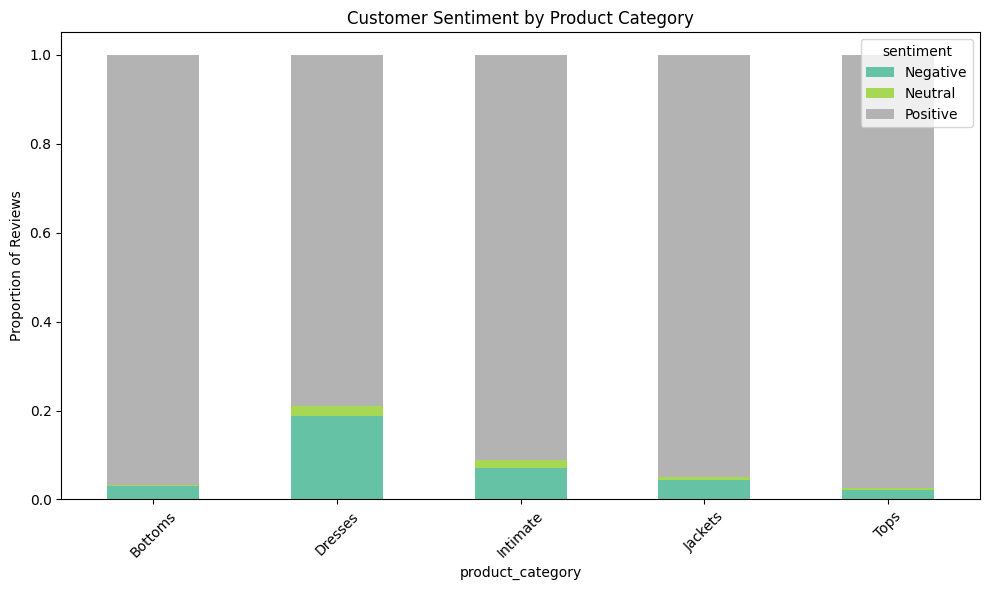

In [16]:
# Group by product category and sentiment, then calculate proportions
sentiment_summary = df.groupby('product_category')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Display sentiment proportions by product category
print(sentiment_summary)

# Visualize the sentiment proportions
sentiment_summary.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Customer Sentiment by Product Category')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
##Customer Satisfaction Analysis with VADER

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment based on compound score
def get_sentiment_vader(text):
    score = sia.polarity_scores(text)['compound']  # Get the compound score
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the cleaned reviews
df['sentiment'] = df['clean_review'].apply(get_sentiment_vader)

# Display sentiment results
print(df[['product_review', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      product_review sentiment
0  I love, love, love this jumpsuit. it's fun, fl...  Positive
1  Beautifully made pants and on trend with the f...  Positive
2  I never would have given these pants a second ...  Positive
3  These pants are even better in person. the onl...  Positive
4  The silhouette and length of this skirt and le...  Positive


sentiment         Negative   Neutral  Positive
product_category                              
Bottoms           0.005839  0.004380  0.989781
Dresses           0.133627  0.033774  0.832599
Intimate          0.040000  0.024615  0.935385
Jackets           0.005882  0.010294  0.983824
Tops              0.005882  0.002941  0.991176


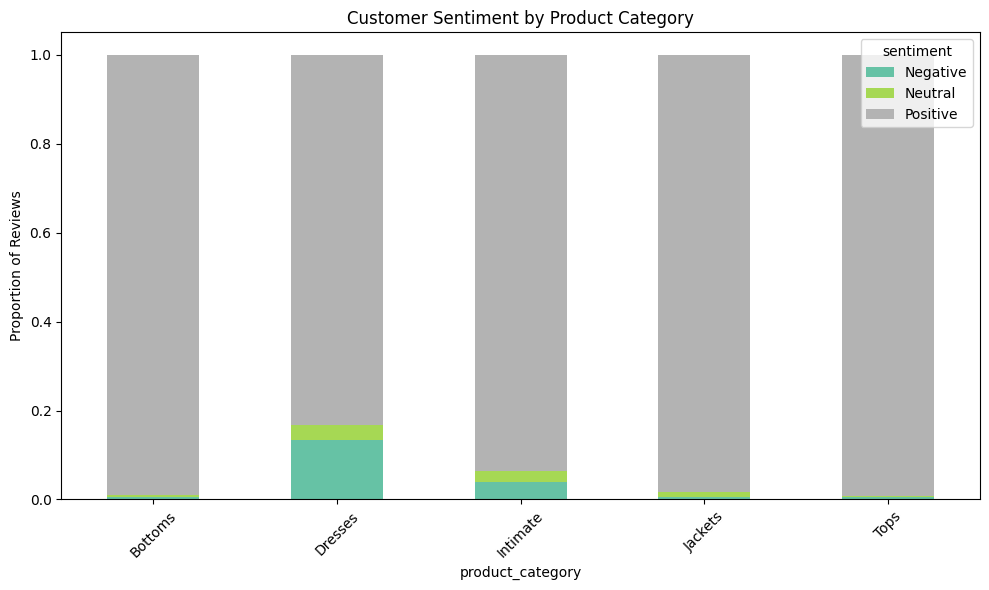

In [18]:
# Group by product category and sentiment, then calculate proportions
sentiment_summary = df.groupby('product_category')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Display sentiment proportions by product category
print(sentiment_summary)

# Visualize sentiment proportions
sentiment_summary.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))
plt.title('Customer Sentiment by Product Category')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
##Customer Satisaction Analysis with SentimentIntensityAnalyzer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt_tab')

# Load the dataset (replace with the path to your actual CSV file)
df = pd.read_csv('dataset.csv')

# Filter the data to only include rows where product_category is 'Dresses'
dresses_df = df[df['product_category'] == 'Dresses']

# Combine all reviews into one string
all_reviews = " ".join(dresses_df['product_review'].dropna())

import nltk
nltk.download('averaged_perceptron_tagger_eng')

# Tokenize and POS tagging
tokens = word_tokenize(all_reviews.lower())
tagged_tokens = pos_tag(tokens)

import nltk
nltk.download('vader_lexicon')
# Extract adjectives (JJ, JJR, JJS represent different forms of adjectives)
adjectives = [word for word, pos in tagged_tokens if pos in ('JJ', 'JJR', 'JJS')]

import nltk
nltk.download('stopwords')
# Remove stopwords from adjectives
stopwords_list = set(stopwords.words('english'))
filtered_adjectives = [word for word in adjectives if word not in stopwords_list and word.isalpha()]

# Frequency distribution of adjectives
from nltk import FreqDist
freq_dist_adjectives = FreqDist(filtered_adjectives)

# Get the 20 most common adjectives
top_20_adjectives = freq_dist_adjectives.most_common(20)

# Print the top 20 adjectives
print("Top 20 Adjectives:", top_20_adjectives)

# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each review and categorize them
dresses_df['sentiment_score'] = dresses_df['product_review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify sentiment as Positive, Neutral, or Negative based on compound score
dresses_df['sentiment'] = dresses_df['sentiment_score'].apply(lambda score: 'Positive' if score > 0.1 else ('Negative' if score < -0.1 else 'Neutral'))

# Print sentiment analysis results
print(dresses_df[['product_review', 'sentiment']].head())


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 Adjectives: [('small', 127), ('beautiful', 91), ('large', 82), ('great', 77), ('much', 76), ('big', 69), ('disappointed', 69), ('good', 66), ('huge', 61), ('cute', 57), ('top', 57), ('nice', 54), ('cheap', 48), ('tight', 47), ('high', 45), ('unflattering', 43), ('short', 43), ('perfect', 42), ('first', 41), ('thin', 39)]
                                        product_review sentiment
685  I don't normally review my purchases, but i wa...  Positive
686  I don't typically write bad reviews, but this ...  Positive
687  I loved the photo of this dress. upon examinat...  Positive
688  Very cheap looking material. looks cheap to co...   Neutral
689  There is no way this is worth the price. i was...   Neutral


C:\Users\user\AppData\Local\Temp\ipykernel_23632\343094721.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dresses_df['sentiment_score'] = dresses_df['product_review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
C:\Users\user\AppData\Local\Temp\ipykernel_23632\343094721.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dresses_df['sentiment'] = dresses_df['sentiment_score'].apply(lambda score: 'Positive' if score > 0.1 else ('Negative' if score < -0.1 else 'Neutral'))


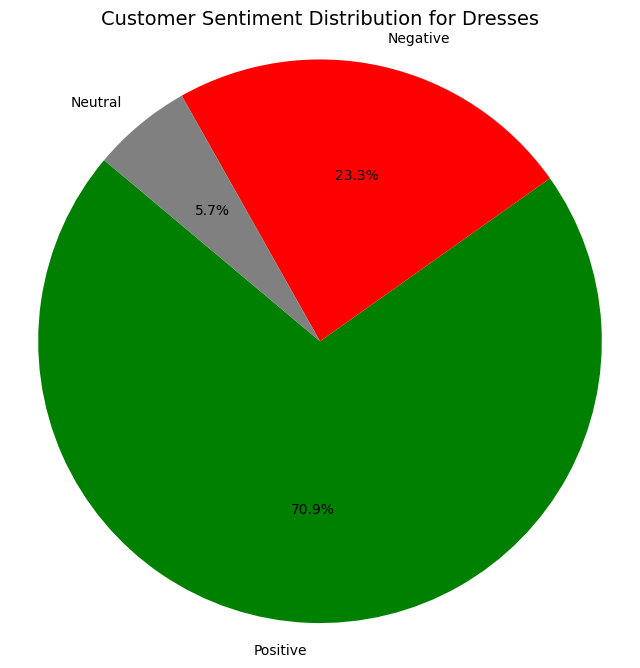

C:\Users\user\AppData\Local\Temp\ipykernel_23632\350858989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=dresses_df, palette='Set2')


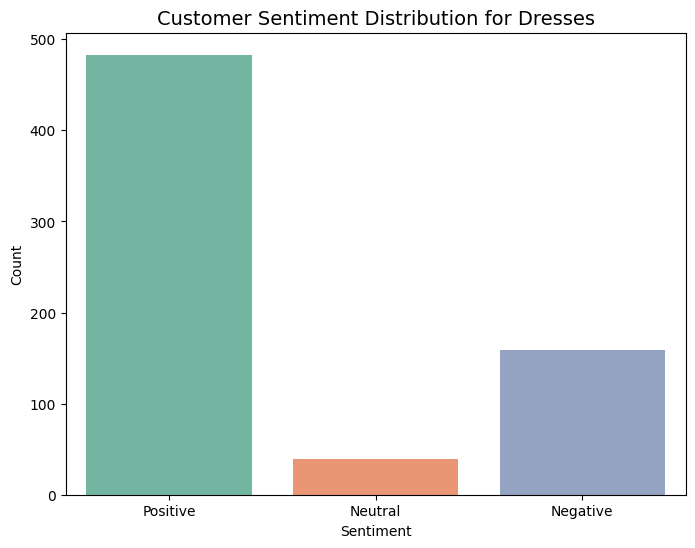

In [25]:
import seaborn as sns

# Plot Sentiment Distribution (Pie Chart)
sentiment_counts = dresses_df['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'], startangle=140)
plt.title('Customer Sentiment Distribution for Dresses', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Plot Sentiment Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=dresses_df, palette='Set2')
plt.title('Customer Sentiment Distribution for Dresses', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [27]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset (replace with the path to your actual CSV file)
df = pd.read_csv('dataset.csv')

# Filter the data to only include rows where product_category is 'Dresses'
dresses_df = df[df['product_category'] == 'Dresses']

# Combine all reviews into one string
all_reviews = " ".join(dresses_df['product_review'].dropna())

# Tokenize the reviews
tokens = word_tokenize(all_reviews.lower())

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to extract negative words based on sentiment score
negative_words = [word for word in tokens if sia.polarity_scores(word)['compound'] < -0.1]

# Remove stopwords and non-alphabetical tokens
stopwords_list = set(nltk.corpus.stopwords.words('english'))
filtered_negative_words = [word for word in negative_words if word not in stopwords_list and word.isalpha()]

# Get frequency distribution of negative words
from nltk import FreqDist
freq_dist_negative = FreqDist(filtered_negative_words)

# Get the 20 most common negative words
top_20_negative_words = freq_dist_negative.most_common(20)

# Print the result
print("Top 20 Negative Words:", top_20_negative_words)


Top 20 Negative Words: [('disappointed', 87), ('cut', 80), ('unfortunately', 55), ('sadly', 36), ('loose', 35), ('bad', 33), ('sad', 26), ('weird', 25), ('awful', 24), ('strange', 22), ('problem', 21), ('odd', 20), ('poor', 18), ('wrong', 18), ('terrible', 16), ('low', 15), ('worn', 15), ('disappointment', 12), ('mess', 12), ('awkward', 12)]


C:\Users\user\AppData\Local\Temp\ipykernel_23632\3874560674.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Negative Word', data=negative_df, palette='Blues_d')


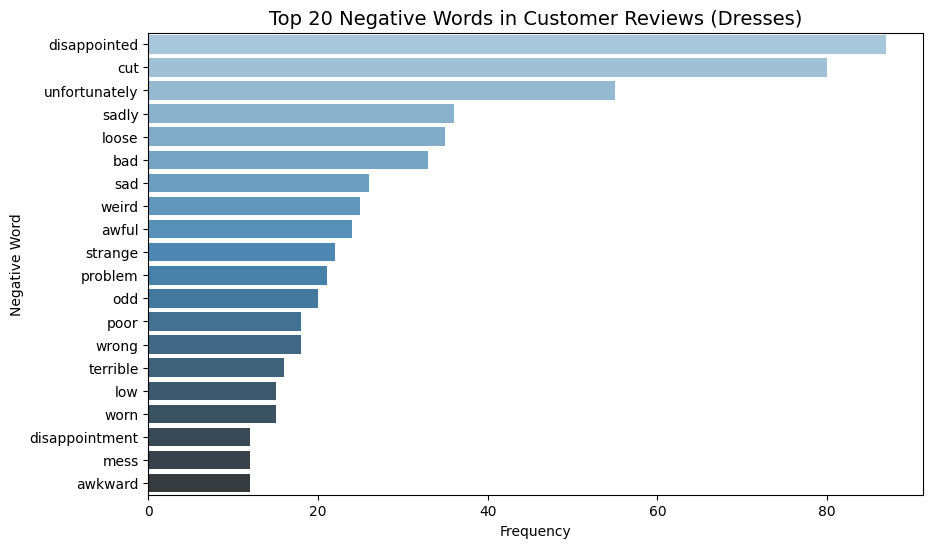

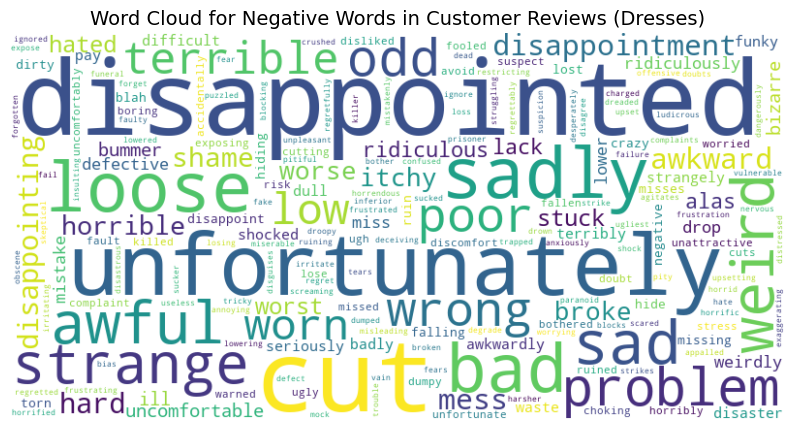

In [31]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset (replace with the path to your actual CSV file)
df = pd.read_csv('dataset.csv')

# Filter the data to only include rows where product_category is 'Dresses'
dresses_df = df[df['product_category'] == 'Dresses']

# Combine all reviews into one string
all_reviews = " ".join(dresses_df['product_review'].dropna())

# Tokenize the reviews
tokens = word_tokenize(all_reviews.lower())

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to extract negative words based on sentiment score
negative_words = [word for word in tokens if sia.polarity_scores(word)['compound'] < -0.1]

# Remove stopwords and non-alphabetical tokens
stopwords_list = set(nltk.corpus.stopwords.words('english'))
filtered_negative_words = [word for word in negative_words if word not in stopwords_list and word.isalpha()]

# Get frequency distribution of negative words
from nltk import FreqDist
freq_dist_negative = FreqDist(filtered_negative_words)

# Get the 20 most common negative words
top_20_negative_words = freq_dist_negative.most_common(20)

# Visualization 1: Bar Chart for Negative Words
negative_df = pd.DataFrame(top_20_negative_words, columns=['Negative Word', 'Frequency'])

# Plot Top 20 Negative Words Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Negative Word', data=negative_df, palette='Blues_d')
plt.title('Top 20 Negative Words in Customer Reviews (Dresses)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Negative Word')
plt.show()

# Visualization 2: Word Cloud for Negative Words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_negative)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Words in Customer Reviews (Dresses)', fontsize=14)
plt.show()


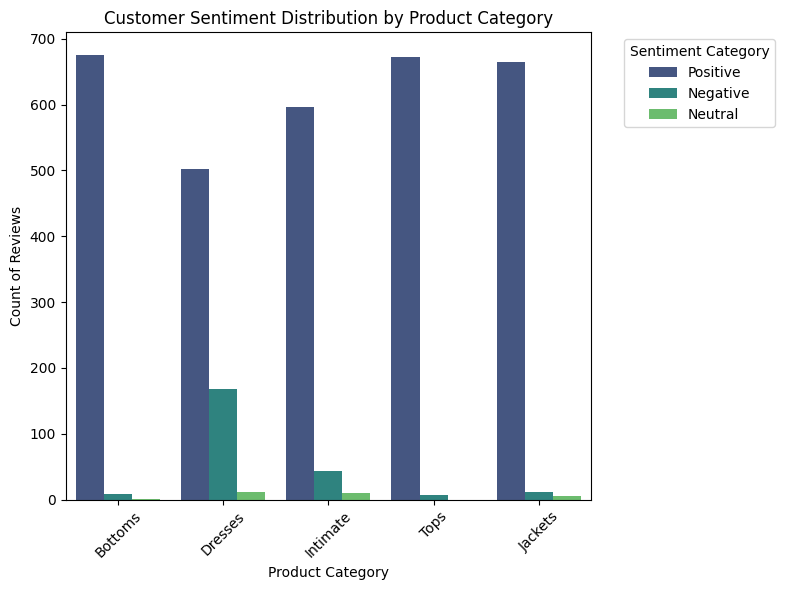

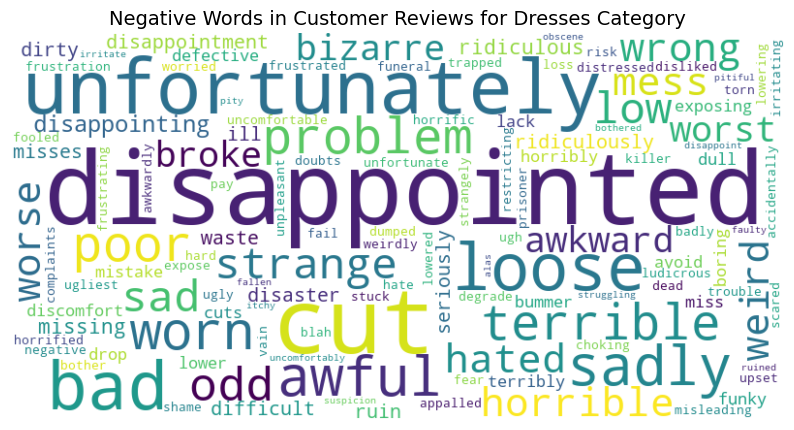

In [34]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset (replace with the path to your actual CSV file)
df = pd.read_csv('dataset.csv')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment for each review
def get_sentiment(review):
    if isinstance(review, str):
        return sia.polarity_scores(review)['compound']
    else:
        return 0  # Return neutral if review is not a string

# Apply sentiment analysis to the product reviews
df['sentiment'] = df['product_review'].apply(get_sentiment)

# Create a new column for sentiment categories: Positive, Negative, Neutral
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plotting the sentiment distribution for each product category
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='product_category', hue='sentiment_category', palette='viridis')
plt.title('Customer Sentiment Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)

# Move the legend outside of the plot
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Now, find the category with the most negative reviews
negative_reviews_df = df[df['sentiment_category'] == 'Negative']
category_negative_counts = negative_reviews_df['product_category'].value_counts()

# Get the category with the most negative reviews
most_negative_category = category_negative_counts.idxmax()

# Filter the negative reviews for that category
most_negative_reviews = negative_reviews_df[negative_reviews_df['product_category'] == most_negative_category]

# Combine all negative reviews for the most negative category into one string
all_negative_reviews = " ".join(most_negative_reviews['product_review'].dropna())

# Tokenize the negative reviews
tokens = word_tokenize(all_negative_reviews.lower())

# Function to extract negative words based on sentiment score
negative_words = [word for word in tokens if sia.polarity_scores(word)['compound'] < -0.1]

# Remove stopwords and non-alphabetical tokens
stopwords_list = set(nltk.corpus.stopwords.words('english'))
filtered_negative_words = [word for word in negative_words if word not in stopwords_list and word.isalpha()]

# Get frequency distribution of negative words
from nltk import FreqDist
freq_dist_negative = FreqDist(filtered_negative_words)

# Visualization 2: Word Cloud for Negative Words in the Most Negative Category
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_negative)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Negative Words in Customer Reviews for {most_negative_category} Category', fontsize=14)
plt.show()



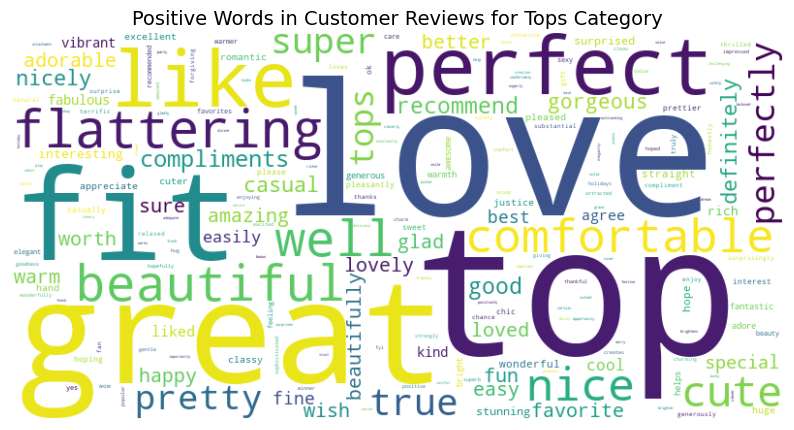

In [35]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset (replace with the path to your actual CSV file)
df = pd.read_csv('dataset.csv')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment for each review
def get_sentiment(review):
    if isinstance(review, str):
        return sia.polarity_scores(review)['compound']
    else:
        return 0  # Return neutral if review is not a string

# Apply sentiment analysis to the product reviews
df['sentiment'] = df['product_review'].apply(get_sentiment)

# Create a new column for sentiment categories: Positive, Negative, Neutral
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Find the category with the least number of negative reviews
negative_reviews_df = df[df['sentiment_category'] == 'Negative']
category_negative_counts = negative_reviews_df['product_category'].value_counts()

# Get the category with the least number of negative reviews
least_negative_category = category_negative_counts.idxmin()

# Filter the positive reviews for that category
positive_reviews_df = df[df['sentiment_category'] == 'Positive']
positive_reviews_for_category = positive_reviews_df[positive_reviews_df['product_category'] == least_negative_category]

# Combine all positive reviews for the least negative category into one string
all_positive_reviews = " ".join(positive_reviews_for_category['product_review'].dropna())

# Tokenize the positive reviews
tokens = word_tokenize(all_positive_reviews.lower())

# Function to extract positive words based on sentiment score
positive_words = [word for word in tokens if sia.polarity_scores(word)['compound'] > 0.1]

# Remove stopwords and non-alphabetical tokens
stopwords_list = set(nltk.corpus.stopwords.words('english'))
filtered_positive_words = [word for word in positive_words if word not in stopwords_list and word.isalpha()]

# Get frequency distribution of positive words
from nltk import FreqDist
freq_dist_positive = FreqDist(filtered_positive_words)

# Visualization 2: Word Cloud for Positive Words in the Least Negative Category
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_positive)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Positive Words in Customer Reviews for {least_negative_category} Category', fontsize=14)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_23632\3254657333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


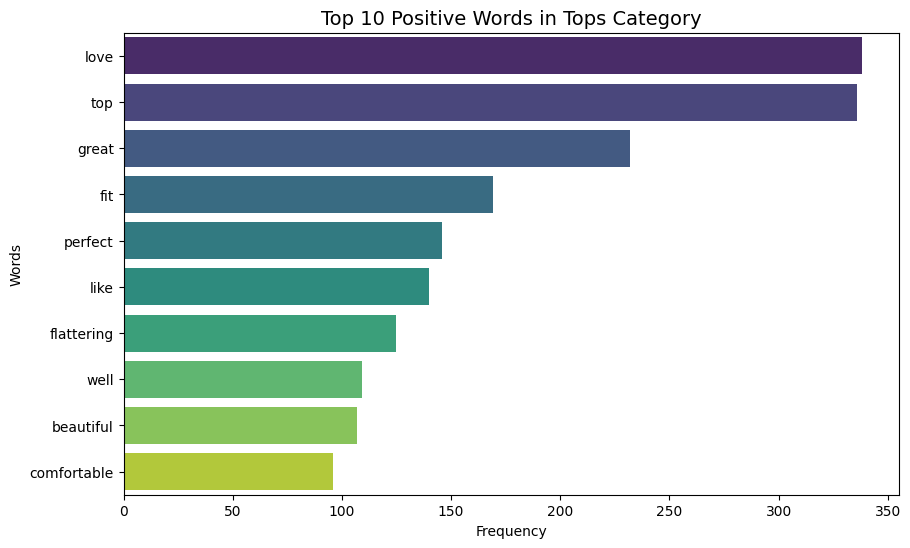

In [36]:
# Create a bar plot for the top 10 positive words
top_10_positive_words = freq_dist_positive.most_common(10)
words, counts = zip(*top_10_positive_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title(f'Top 10 Positive Words in {least_negative_category} Category', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


<Figure size 1000x600 with 0 Axes>

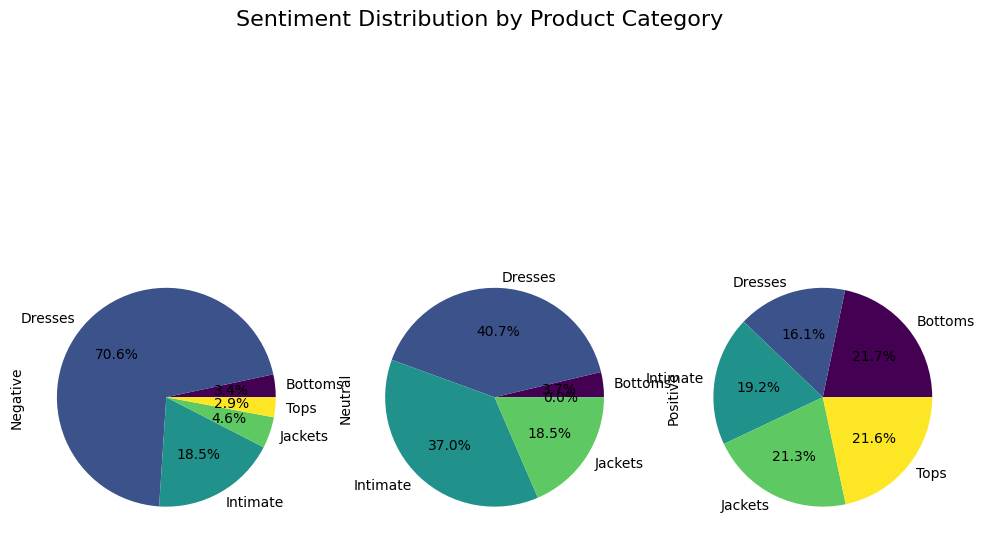

In [38]:
# Group by product category and sentiment category
sentiment_counts_by_category = df.groupby(['product_category', 'sentiment_category']).size().unstack().fillna(0)

# Plot pie chart for sentiment distribution in each category
plt.figure(figsize=(10, 6))
sentiment_counts_by_category.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(12, 8), legend=False, cmap='viridis')
plt.suptitle('Sentiment Distribution by Product Category', fontsize=16)
plt.show()


<Figure size 1200x800 with 0 Axes>

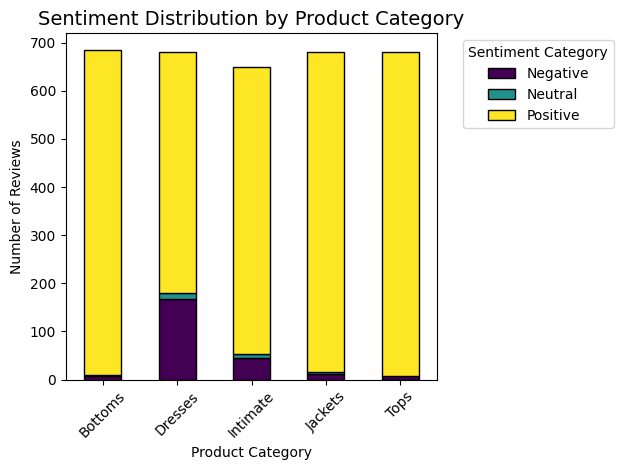

In [39]:
# Group by product category and sentiment category, then plot stacked bar chart
sentiment_counts_by_category = df.groupby(['product_category', 'sentiment_category']).size().unstack().fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
sentiment_counts_by_category.plot(kind='bar', stacked=True, cmap='viridis', edgecolor='black')
plt.title('Sentiment Distribution by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


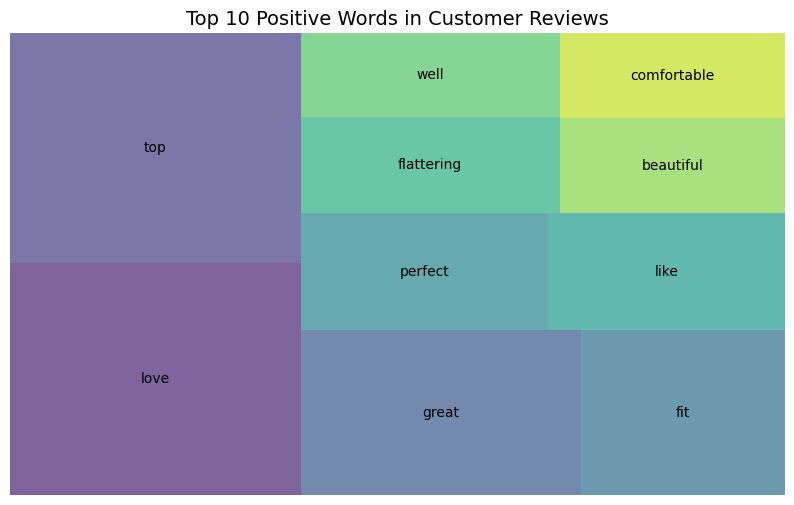

In [42]:
import squarify

# Get the frequency of top positive words
top_positive_words = dict(freq_dist_positive.most_common(10))

# Create a treemap for the positive words
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_positive_words.values(), label=top_positive_words.keys(), color=sns.color_palette("viridis", len(top_positive_words)), alpha=0.7)
plt.title('Top 10 Positive Words in Customer Reviews', fontsize=14)
plt.axis('off')
plt.show()
